In [72]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

In [83]:
books = pd.read_csv('books.csv')

In [84]:
books['Date Read'] = pd.to_datetime(books['Date Read'])
books['Date Started'] = pd.to_datetime(books['Date Started'])

In [85]:
books_full = books.copy()

In [86]:
books['Finished'] = books['Date Read'].notnull()
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(2016,12,31))

In [87]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)

In [88]:
books['Time to Read'].where(books['Finished'] == False,datetime.timedelta(days=0))
books.head(3)

0     0 days
1     0 days
2     0 days
3     0 days
4     0 days
5     0 days
6     0 days
7     0 days
8     0 days
9     0 days
10    0 days
11    0 days
12    0 days
13    0 days
14   30 days
15   90 days
16   96 days
Name: Time to Read, dtype: timedelta64[ns]

In [89]:
books['Pages per Day'] = books['Number of Pages'] / [x.days for x in books['Time to Read']]

In [90]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id'):
    del books[c]

In [96]:
books.sort_values(by='Date Started',ascending=True,inplace=True)
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])

In [167]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color,False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(2016,1,1)] = "#55A868"
clist = list(s)

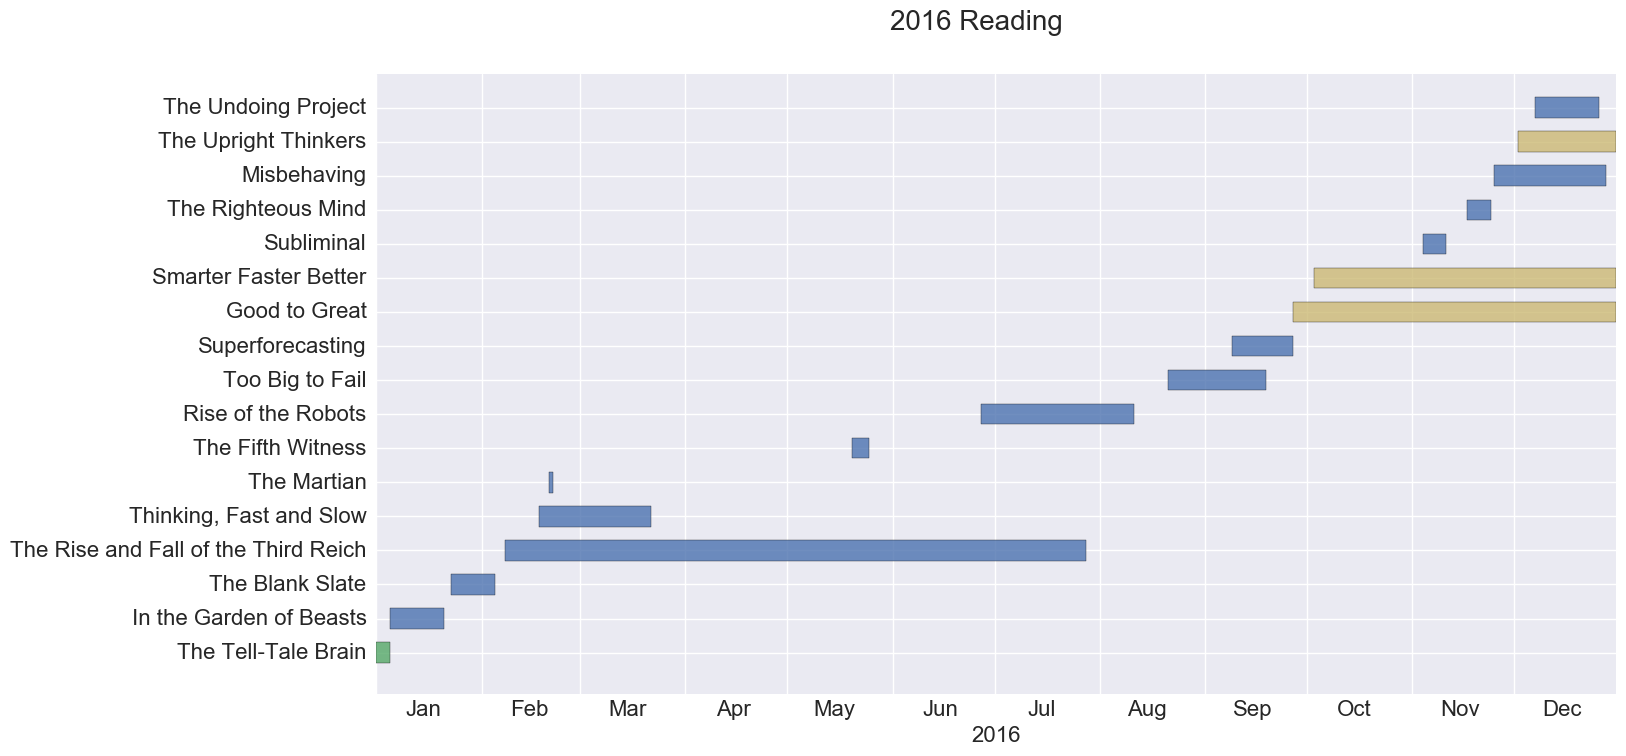

In [221]:
# books = books[books['Time to Read'] != pd.Timedelta(days=0)]
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(2016, 1, 1):
        date = datetime.datetime(2016, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen=len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, end_date - start_date, label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 16)
ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)

ax.xaxis_date()
ax.set_xlim(xmin=_create_date(datetime.datetime(2016, 1, 1)),
           xmax=_create_date(datetime.datetime(2016, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

fig.suptitle('2016 Reading', fontsize=20)
plt.xlabel('2016', fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 

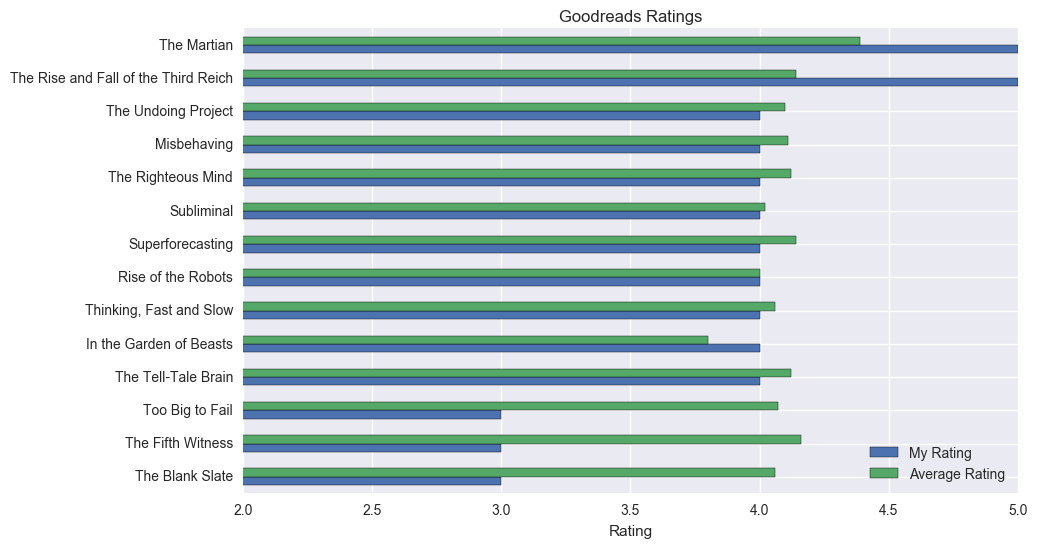

In [225]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by='My Rating',ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',xlim=(2,5),figsize=(10,6),title='Goodreads Ratings')
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating')

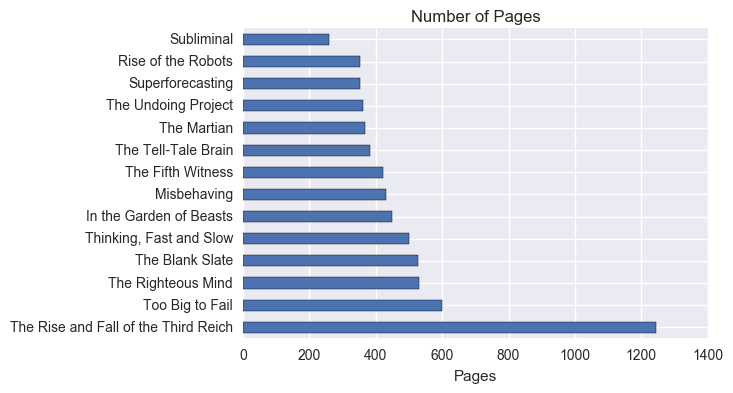

In [223]:
books_ = books[books['Finished'] == True]
books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                            title='Number of Pages').yaxis.label.set_visible(False)
plt.xlabel('Pages')
plt.savefig('pages.png')

In [103]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%s)'%(row['Title'],row['Author'],row['Original Publication Year']))

The Tell-Tale Brain: A Neuroscientist's Quest for What Makes Us Human by V.S. Ramachandran (2011)
In the Garden of Beasts: Love, Terror, and an American Family in Hitler's Berlin by Erik Larson (2011)
The Blank Slate: The Modern Denial of Human Nature by Steven Pinker (2002)
The Martian by Andy Weir (2011)
Thinking, Fast and Slow by Daniel Kahneman (2011)
The Fifth Witness by Michael Connelly (2011)
The Rise and Fall of the Third Reich: A History of Nazi Germany by William L. Shirer (1960)
Rise of the Robots: Technology and the Threat of a Jobless Future by Martin Ford (2015)
Too Big to Fail: The Inside Story of How Wall Street and Washington Fought to Save the Financial System from Crisis and Themselves by Andrew Ross Sorkin (2008)
Superforecasting: The Art and Science of Prediction by Philip E. Tetlock (2015)
Subliminal: How Your Unconscious Mind Rules Your Behavior by Leonard Mlodinow (2012)
The Righteous Mind: Why Good People are Divided by Politics and Religion by Jonathan Haidt (

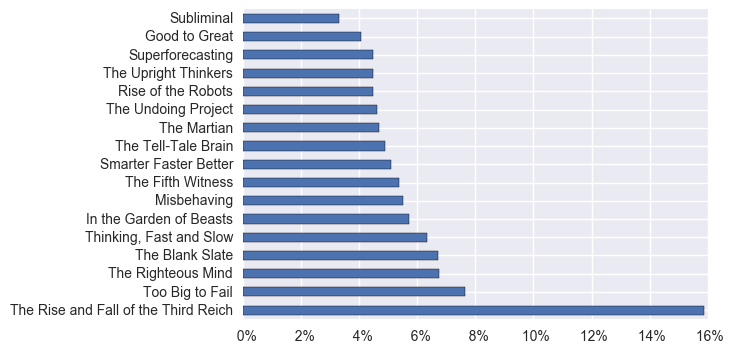

In [224]:
books['Percent'] = books['Number of Pages']/books['Number of Pages'].sum()
ax = books['Percent'].sort_values(ascending=False).plot(kind='barh')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals])

Average Number of Pages over Year: 18.58082191780822


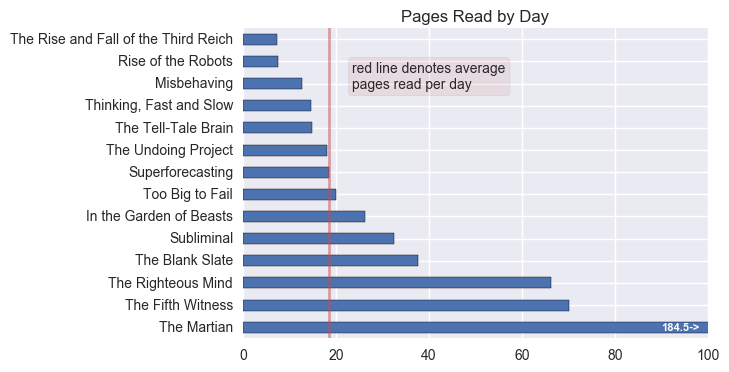

In [218]:
books_ = books[books['Finished'] == True]
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               title='Pages Read by Day',
                                                               xlim=(0,100))
ax.yaxis.label.set_visible(False)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+5, 12, 'red line denotes average\npages read per day',
        verticalalignment='top',horizontalalignment='left', bbox=props)
mpd = books_.loc['The Martian','Pages per Day']
mpd = str(mpd)+'->'
ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
        verticalalignment='top',horizontalalignment='left')
avg = books_['Number of Pages'].sum()/365
plt.axvline(x=avg,linewidth=2, color="#C44E52",alpha=0.5)
print ('Average Number of Pages over Year:',avg)

In [131]:
books_ = books[books['Finished'] == True]
orig_start = books_.loc['The Tell-Tale Brain','Date Started']
date_read = books_.loc['The Tell-Tale Brain','Date Read']
new_start = datetime.datetime(2016,1,1)
orig_pages = books_.loc['The Tell-Tale Brain','Number of Pages']
books_.loc['The Tell-Tale Brain','Number of Pages'] = orig_pages*(((date_read - new_start).days+1) / 
                                                                  ((date_read - orig_start).days+1))
print ('Average Number of Pages over Year:',books_['Number of Pages'].sum()/365)

Average Number of Pages over Year: 17.731085353003163


/Users/lukestarnes/anaconda/envs/Py3.5/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [74]:
print ((books['Number of Pages'].sum()-1245)/13)
print ((books['Number of Pages'].sum())/14)

425.9230769230769
484.42857142857144


In [ ]:
# ax = books[['Original Publication Year']].plot(kind='pie')
books_ = books.copy()
books_['T'] = books_.index
books_.reset_index(inplace=True)
books_ = books_[['Original Publication Year','T']]
print (books_['Original Publication Year'].value_counts())
books_['Original Publication Year'].plot(kind='hist')
# books_[['Original Publication Year','T']].plot(y='Original Publication Year',x='T',kind='pie')
# books_['Original Publication Year'].plot.pie()